Precargando datos de la base de datos MNIST

In [56]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Mostrando algún dato

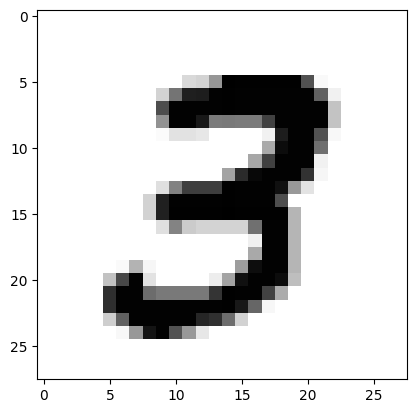

In [57]:
import matplotlib.pyplot as plt

plt.imshow(x_train[7], cmap=plt.cm.binary)

In [58]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


Normalizando input vector a flot

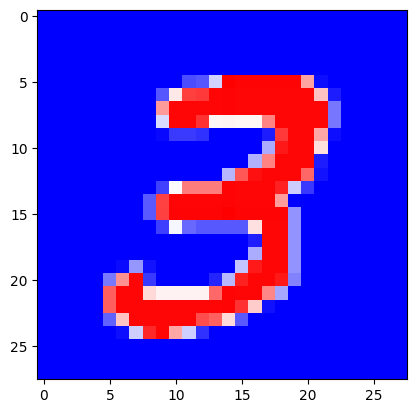

In [59]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

plt.imshow(x_train[7], cmap=plt.cm.bwr)

Convertimos ahora cada vector 2D a un vector 1D para meterlo como entrada de la red neuronal


In [60]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_original = x_test
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

Pasamos a categorical: un número se codifica como un array donde la entrada correspondiente a dicho número es un 1

In [61]:
from tensorflow.keras.utils import to_categorical

print(y_train[:10])
print("... pasaría a...")

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
... pasaría a...
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Definiremos ahora la red neuronal en keras

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# estructura que permite una RN básica
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# parámetros que se muestran:
# primera capa: (784 pixeles+1 sesgo) * 10
# segunda capa (10 + 1 sesgo) * 10
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [63]:
#configuración del proceso de aprendizaje

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

#entrenamiento del modelo

history = model.fit(x_train, y_train, epochs=5)

history.history

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9219 - accuracy: 0.5163
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3327 - accuracy: 0.7225
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9915 - accuracy: 0.7898
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7968 - accuracy: 0.8274
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6776 - accuracy: 0.8498


{'loss': [1.9218802452087402,
  1.3327213525772095,
  0.9914883971214294,
  0.7967597246170044,
  0.6775741577148438],
 'accuracy': [0.5163499712944031,
  0.7224833369255066,
  0.7897833585739136,
  0.8273666501045227,
  0.8497999906539917]}

In [64]:
# evaluación del modelo

test_loss, test_acc = model.evaluate(x_test, y_test)

print("loss", test_loss)
print("accuracy", test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.6237 - accuracy: 0.8628
loss 0.623744785785675
accuracy 0.8628000020980835


313/313 [==============================] - 0s 1ms/step


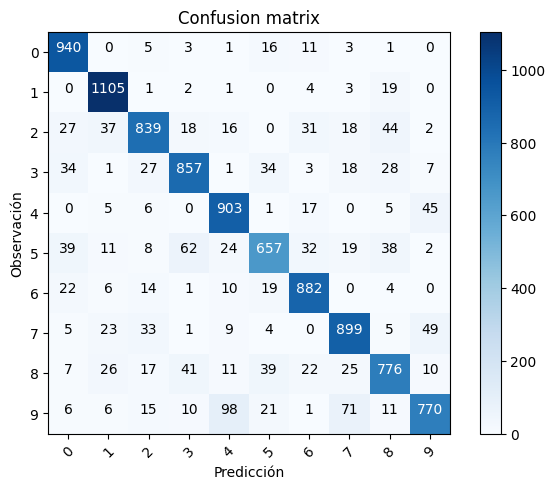

In [65]:
import numpy as np

# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

#cálculo de matriz de confusión

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

1/1 [==============================] - 0s 22ms/step
probabilidades de todos los numeros [[0.00130803 0.13088217 0.0077695  0.02453364 0.07169306 0.11532941
  0.01501312 0.09671474 0.24478354 0.29197273]]
indice con mayor probabilidad 9


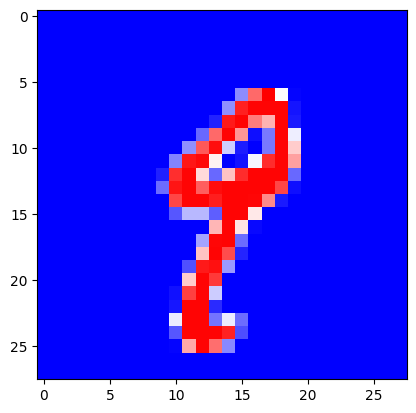

In [68]:
# Generando predicciones, por ejemplo, miramos el siguiente número y vemos si lo predice bien
plt.imshow(x_test_original[78], cmap=plt.cm.bwr)

predictions= model.predict(x_test[78:79])

print("probabilidades de todos los numeros",predictions)
print("indice con mayor probabilidad", np.argmax(predictions))